# Introduction: 
---

 > Premise: Let us explore and visualize earnings based on College Majors and analyze th following:
 
 Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?

* Using scatter plots

How many majors are predominantly male? Predominantly female?

* Using histograms

Which category of majors have the most students?

* Using bar plots


In [1]:
# Always call the libraries before use
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
#Makes plots display inline

#Lets read the files into DF:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


On a face-value analysis we can see that the Top 5 Majors that lead to considerable employment would be:

    1. Petroleum Engineering 
    2. Mineral Engineering 
    3. Metallurgical Engineering
    4. Naval Engineering 
    5. Chemical Engineering

These are all classified under STEM and as BLS statistics sugguests most engineering careers have a upward trajectory far exceeding the national growth rate. On preliminary analysis the ranking appears to be consistent with employment data.

In [3]:
ShareMen = []
for values in recent_grads["ShareWomen"]:
    values = 1 - values
    ShareMen.append(values)
recent_grads["ShareMen"] = ShareMen



In [4]:
recent_grads[["Major","Total","Men","Women","ShareWomen", "ShareMen"]].head(5)

,Major,Total,Men,Women,ShareWomen,ShareMen
0,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,0.120564,0.879436
1,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,0.101852,0.898148
2,METALLURGICAL ENGINEERING,856.0,725.0,131.0,0.153037,0.846963
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,0.107313,0.892687
4,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,0.341631,0.658369


From the dataset we can that the top 5 empoyable majors are predominantley Male oriented:

   * Roughly 60-90 percent of Males occupy the top 5 shares in the major.
   
This may be a indicator of gender disparity among majors in the STEM curriculum.

In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,0.362707
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,0.182901
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,0.200141
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,0.201254
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,410,87,0.104946,22000,20000,22000,288,338,192,0.122040


In [6]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'ShareMen'],
      dtype='object')

In [7]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,172.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341,0.477777
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579,0.231205
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000,0.031046
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000,0.296701
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000,0.465976
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000,0.663974
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000,1.000000


## Missing Values and Errors In our Data:
---
* Under Sameple_size we for Major code (173.0) notice that both men and women display the following:

Men: 172

Women: 172

ShareWomen: 172

Sample_Size = 173

The total is 172 but the Sample_Size shows 173 also the share of women in the major corresponds to the total which sugguest that the data is incorrect and missing.

In [8]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [9]:
recent_grads = recent_grads.dropna() # Drop the missing values in my rows.
recent_grads_cleaned = print(recent_grads.shape[0])

172


# Visualization of Data: Scatter Plots:
---

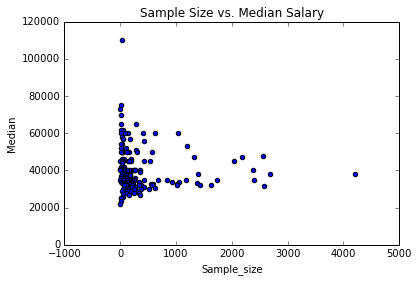

In [10]:
recent_grads.plot(x='Sample_size', y='Median', title = "Sample Size vs. Median Salary",kind='scatter')

Q: Do students in more popular majors make more money?

The scatter plot sugguest that there is little to no relationship between the sample size and the Median Salary.

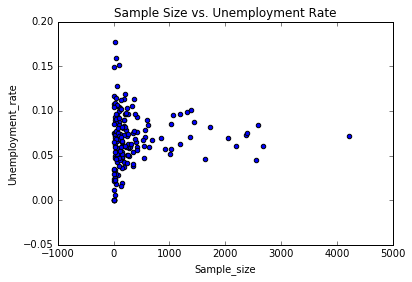

In [11]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',title = "Sample Size vs. Unemployment Rate", kind='scatter')

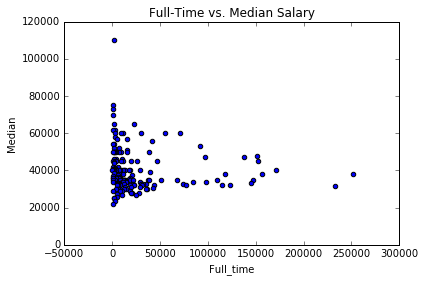

In [12]:
recent_grads.plot(x='Full_time', y='Median',title = "Full-Time vs. Median Salary", kind='scatter')

Q: Is there any link between the number of full-time employees and median salary?

There seems to be no relationship.

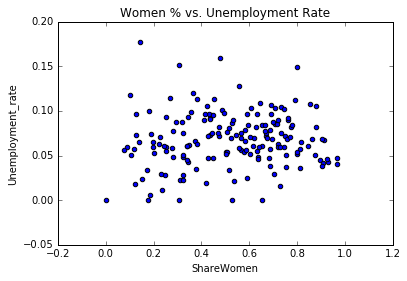

In [13]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',title = "Women % vs. Unemployment Rate", kind='scatter')

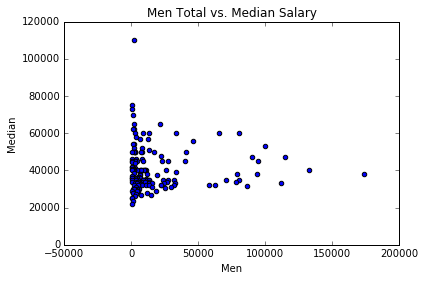

In [14]:
recent_grads.plot(x='Men', y='Median',title = "Men Total vs. Median Salary", kind='scatter')

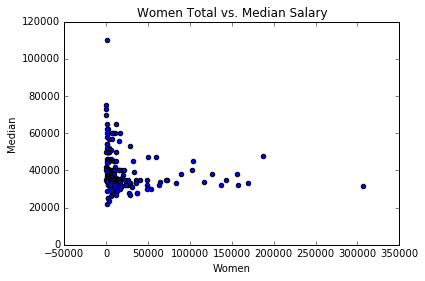

In [15]:
recent_grads.plot(x='Women', y='Median',title = "Women Total vs. Median Salary", kind='scatter')

Q: Do students that majored in subjects that were majority female make more money?
    
There seems to be no visual relationship. There is a small cluster of data ranging from the20K to 40K median salary but there could be several factors that relate to the pay.

# Histogram Pandas:
---


The DataFrame.plot() and Series.plot() methods have many of the same parameters but are used for different use cases. We use Series.plot() to plot a specific column and DataFrame.plot() to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using Series.plot().

If you've looked at the documentation for Series.plot(), you'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using Series.hist(), which contains parameters specific to customizing histograms:


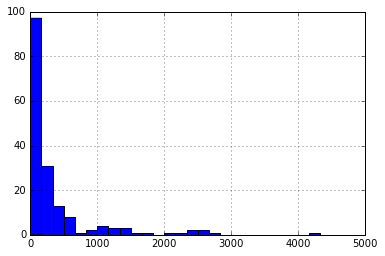

In [19]:
#Lets generate histograms for the following series.
recent_grads["Sample_size"].hist(bins = 30, range =(0, 5000))

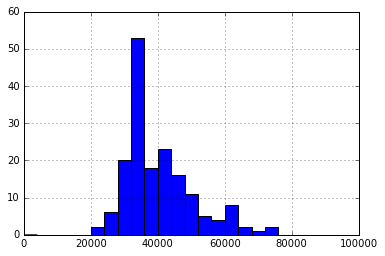

In [25]:
recent_grads["Median"].hist(bins = 25, range =(0, 100000))

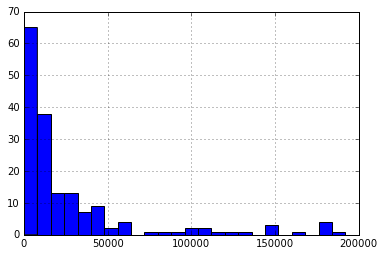

In [35]:
recent_grads["Employed"].hist(bins = 25, range =(0, 200000))

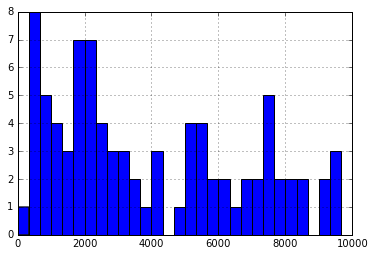

In [48]:
recent_grads["Full_time"].hist(bins = 30, range =(0, 10000))

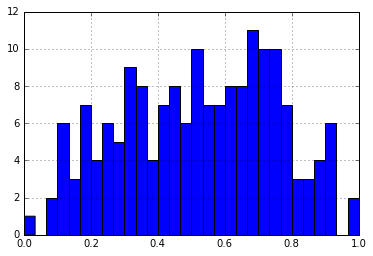

In [53]:
recent_grads["ShareWomen"].hist(bins = 30, range =(0, 1))

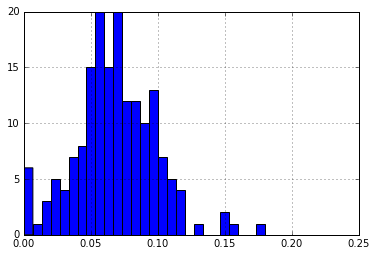

In [60]:
recent_grads["Unemployment_rate"].hist(bins = 30, range =(0, .2))

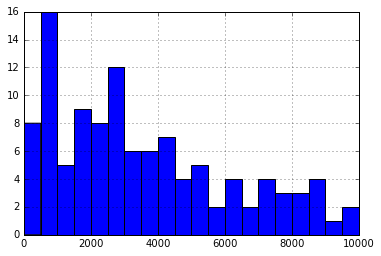

In [68]:
recent_grads["Men"].hist(bins = 20, range =(0, 10000))

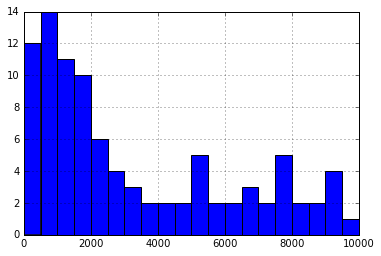

In [70]:
recent_grads["Women"].hist(bins = 20, range =(0, 10000))

# Scatter Matrix: 
---
A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contains a function named scatter_matrix() that generates the plots for us. This function is part of the pandas.plotting module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the scatter_matrix() function.

scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1fa405198>,
      dtype=object)

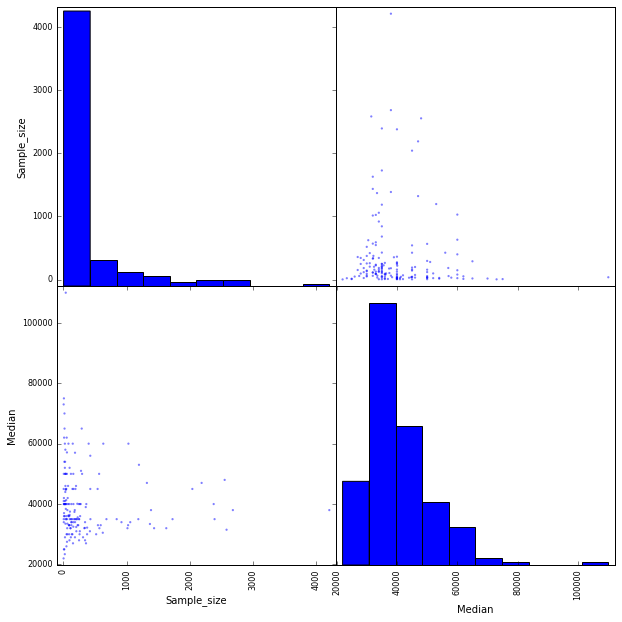

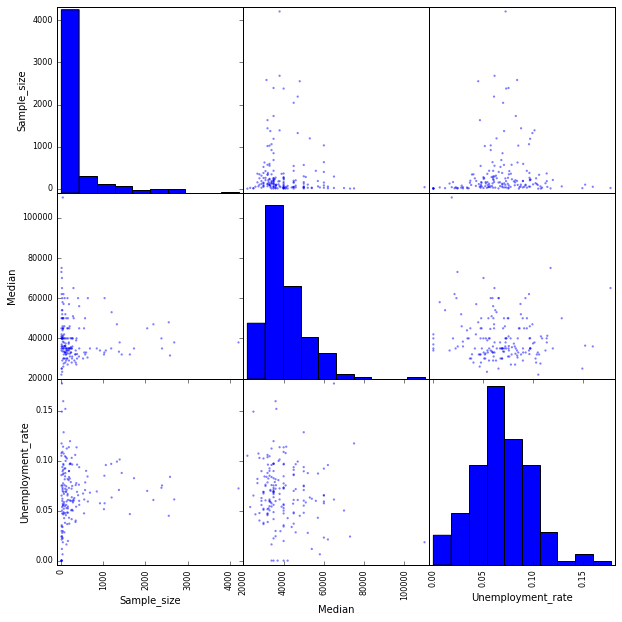

In [72]:
from pandas.plotting import scatter_matrix

# 2 by 2 matrix
scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(10,10))

# 3 by 3 Matrix:

scatter_matrix(recent_grads[["Sample_size","Median", "Unemployment_rate"]], figsize=(10,10))

# Bar Plots:
---
To make barplots we have to specify the following:
* Location
* Labels
* Length
* Width
 
This is an example of a barplot returning the first five values of the column:

recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

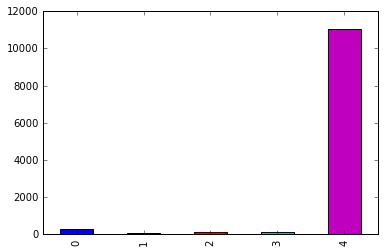

In [74]:
recent_grads[:5]['Women'].plot(kind='bar')

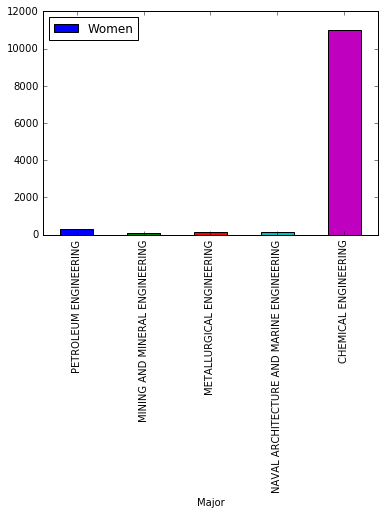

In [77]:
recent_grads[:5].plot.bar(x='Major', y='Women')

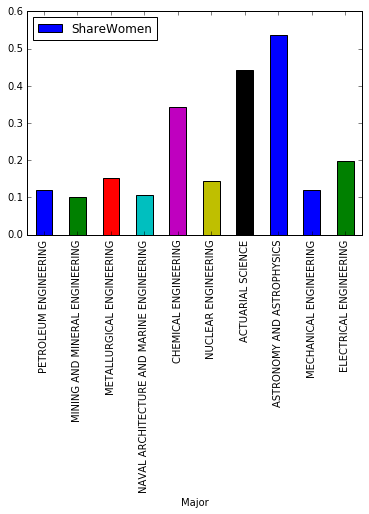

In [79]:
recent_grads[0:10].plot.bar(x = "Major", y = "ShareWomen") # The X and Y specify the Data. The Y pulls the ShareWomen series data.

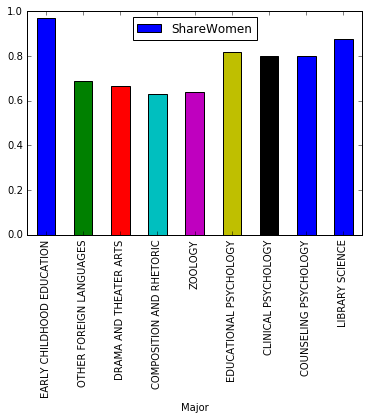

In [81]:
recent_grads[163:].plot.bar(x = "Major", y = "ShareWomen") # The X and Y specify the Data. The Y pulls the ShareWomen series data.